# Ejercicios de Seaborn

### 1. Importa pandas, pyplot y seaborn.

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Activa matplotlib de forma estática.

In [64]:
%matplotlib inline

### 3. Lee 'Pokemon.csv', lee la primera columna del csv como índice del DataFrame.

Para saber que codificación usa un archivo:

In [3]:
import chardet #Para saber que codificación tiene nuestro df
import pandas as pd

ruta_del_archivo = './data/pokemon.csv'

# Detectar la codificación del archivo
with open(ruta_del_archivo, 'rb') as f:
    result = chardet.detect(f.read())

# Imprimir la codificación detectada#
print(result)s
print(result['encoding'])

# La codificación Windows-1252 también se conoce comúnmente como "latin-1" o "iso-8859-1".
prueba = pd.read_csv(ruta_del_archivo, encoding=result['encoding'])
#display(prueba)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Windows-1252


En este caso:

In [66]:
df=pd.read_csv('./data/Pokemon.csv', encoding='latin-1', index_col=0 )
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [67]:
df=pd.read_csv('./data/Pokemon.csv', encoding='latin-1', index_col='#' )
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados.

In [68]:
df.shape

(151, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


### 5. Haz un scatter plot con lmplot(), que es el método que pinta una regresión lineal. Pasa el DataFrame como argumento del método en el parámetro llamado data.

In [8]:
df.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False


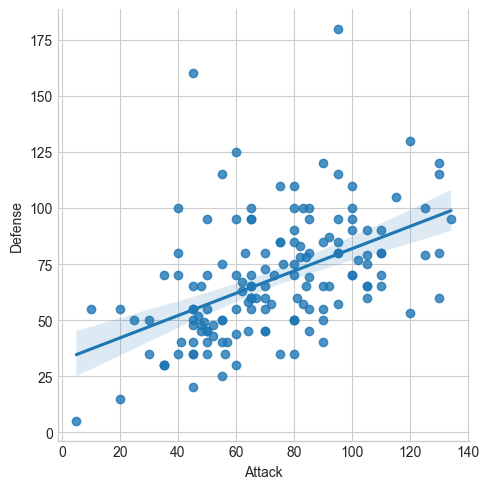

In [70]:
sns.lmplot(data=df,
           x='Attack',
           y='Defense');

### 6. No queremos ver la línea recta de la regresión lineal. Prueba a añadir fit_reg a falso.

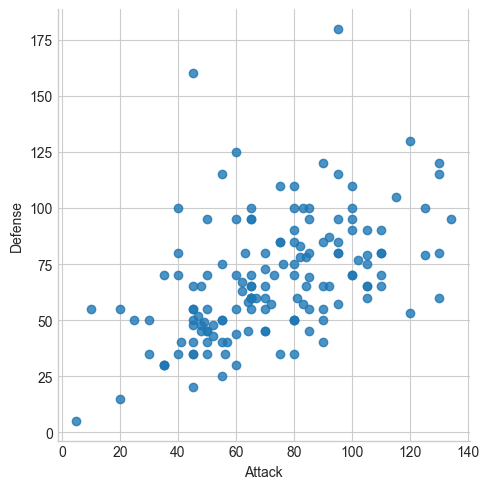

In [71]:
sns.lmplot(data=df,
            x='Attack',
            y='Defense',
            fit_reg=False);

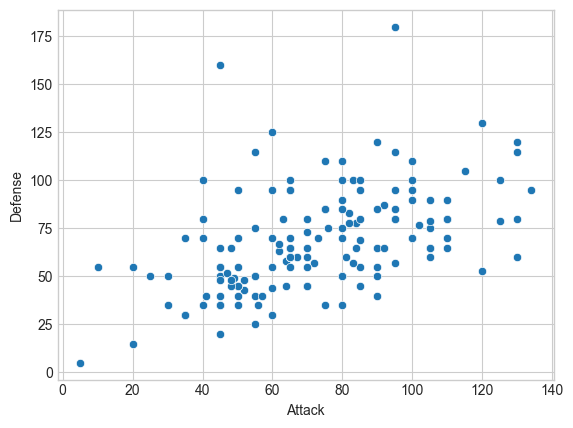

In [73]:
sns.scatterplot(data=df,
            x='Attack',
            y='Defense');

### 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue), que el hue sea el Stage.

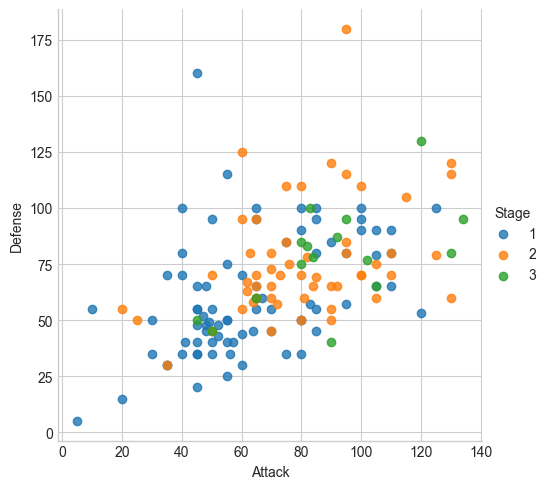

In [75]:
sns.lmplot(data=df,
            x='Attack',
            y='Defense',
            fit_reg=False,
            hue='Stage');

### 8. Limita el eje x entre 20 y 100.

(20.0, 100.0)

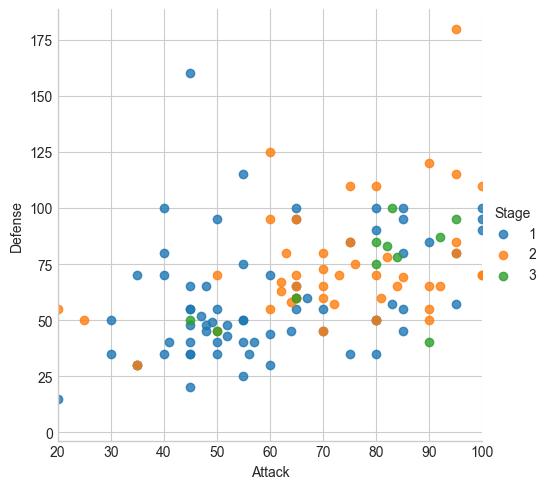

In [76]:
sns.lmplot(data=df,
            x='Attack',
            y='Defense',
            fit_reg=False,
            hue='Stage');
plt.xlim(20,100)

### 9. Dibuja un diagrama de cajas con el dataframe.

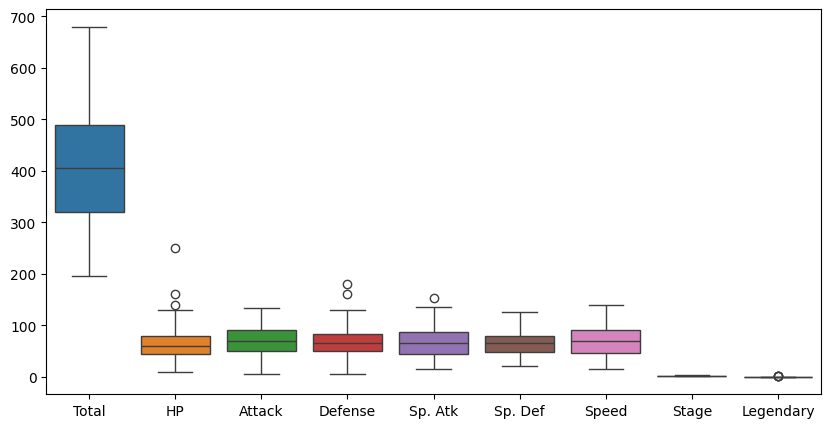

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df);

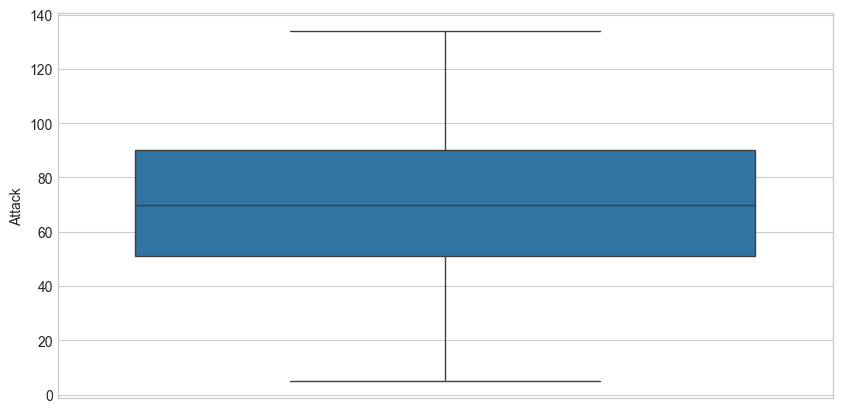

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df['Attack']);

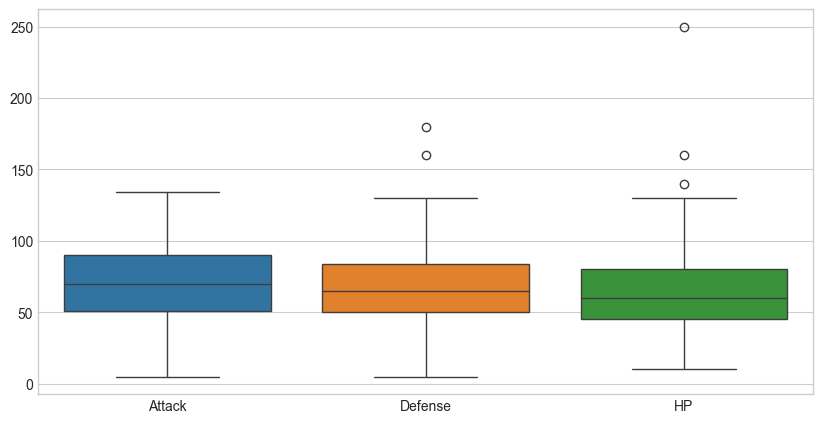

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Attack', 'Defense', 'HP']]);

### 10. No nos interesan las columnas Total, Stage ni Legendary. Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

In [80]:
df_nuevo=df.drop(columns=['Total','Stage','Legendary'])
df_nuevo.head(2)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60


<Axes: >

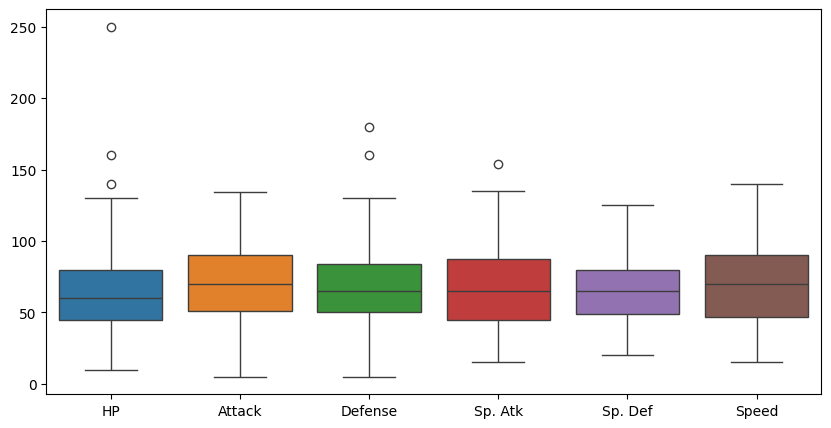

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(df_nuevo)

### 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame.

In [81]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [17]:
len(df['Type 1'].unique()) # cuantos valores unicos

15

In [82]:
df['Type 1'].nunique()

15

In [83]:
df['Type 1'].unique() #Un array con los valores unicos

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [84]:
df['Type 1'].value_counts() #cuantas veces aparece cada uno

Type 1
Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: count, dtype: int64

### 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water' y llamalo df_gfw.

In [85]:
df_gfw=df[(df['Type 1']=='Grass') | (df['Type 1']=='Fire') | (df['Type 1']=='Water')]
df_gfw.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False


In [92]:
df_gfw=df[df['Type 1'].isin(['Grass','Fire','Water'])]
df_gfw.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [88]:
df['Type 1'].isin(['Grass','Fire','Whater'])

#
1       True
2       True
3       True
4       True
5       True
       ...  
147    False
148    False
149    False
150    False
151    False
Name: Type 1, Length: 151, dtype: bool

### 13. Usa un estilo 'whitegrid'.

In [89]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [90]:
plt.style.use('seaborn-v0_8-whitegrid')

### 14. Pinta diagramas de violín con el df_gfw.

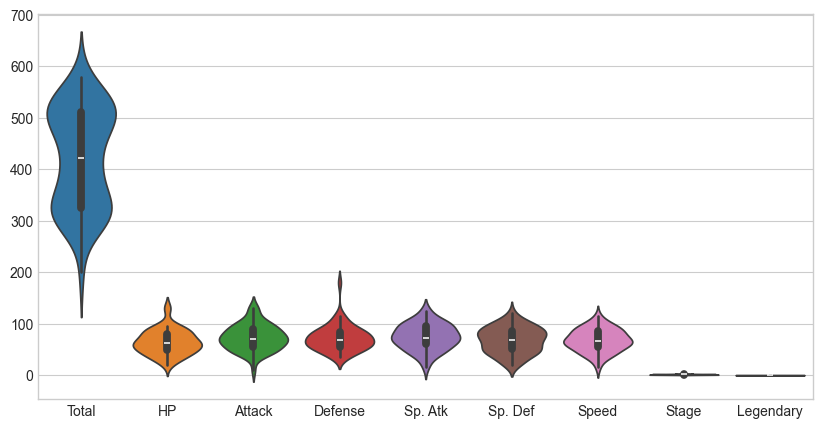

In [24]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_gfw);

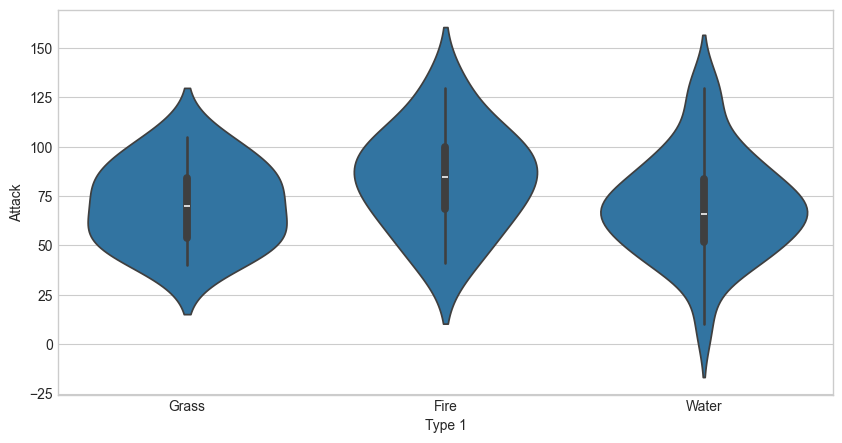

In [93]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_gfw,
               x='Type 1',
               y='Attack');

### 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'.

In [95]:
colores=['#78C850', '#F08030',  '#6890F0']

### 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette).

C:\Users\Bridgeschool37\AppData\Local\Temp\ipykernel_4128\3074618328.py:2: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df_gfw,


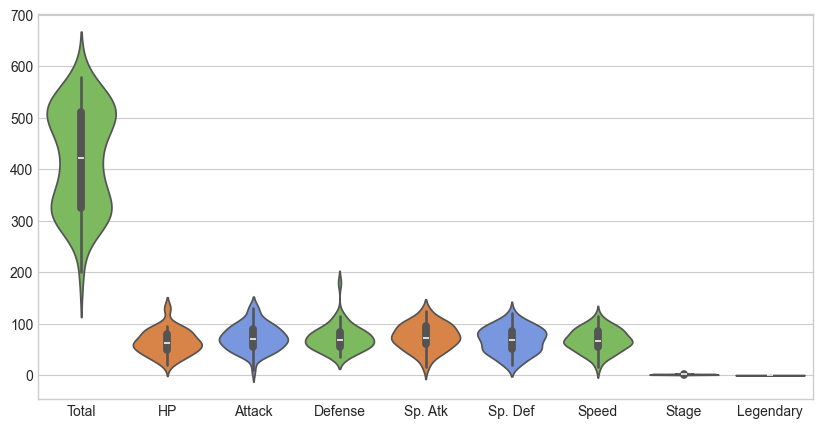

In [26]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_gfw,
               palette=colores); #nuestra paleta contiene 3 colores que se repetiran ciclicamente

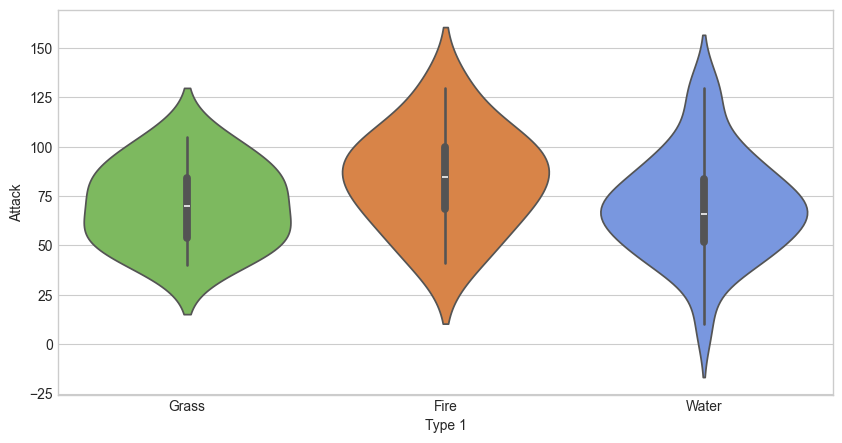

In [94]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_gfw,
               x='Type 1',
               y='Attack',
               palette=colores);

### 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos. Para ver esto, usamos el swarmplot. Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin.

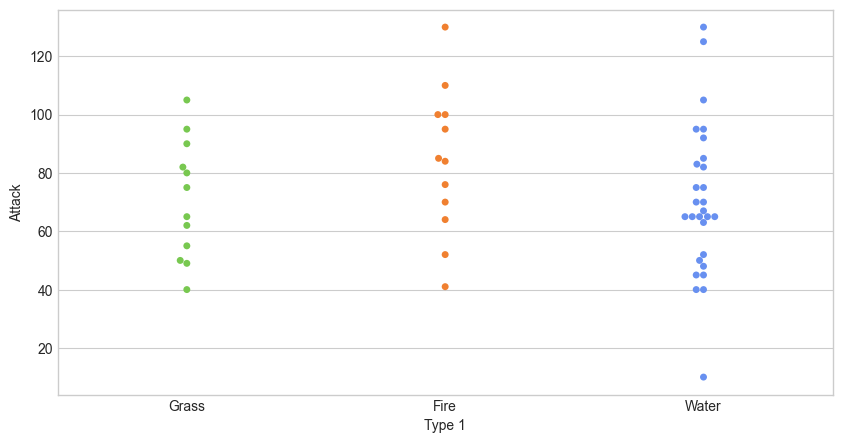

In [100]:
plt.figure(figsize=(10,5))
sns.swarmplot(data=df_gfw,
                x='Type 1',
               y='Attack',
              palette=colores);

c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


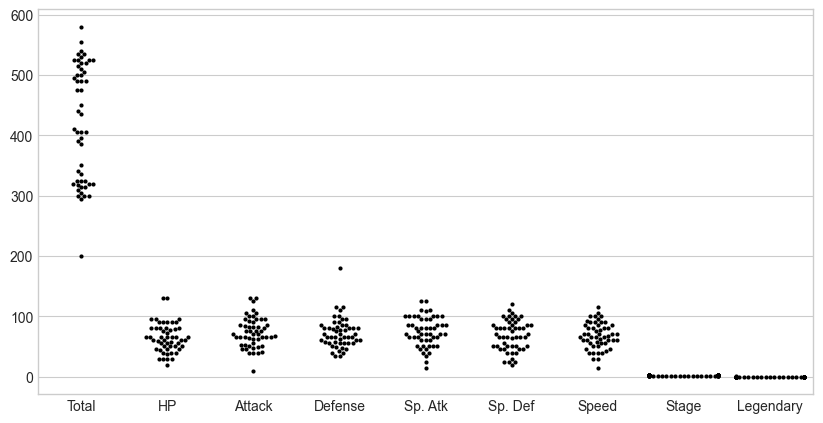

In [27]:
plt.figure(figsize=(10,5))
sns.swarmplot(data=df_gfw,
              color='k',
              size=3);

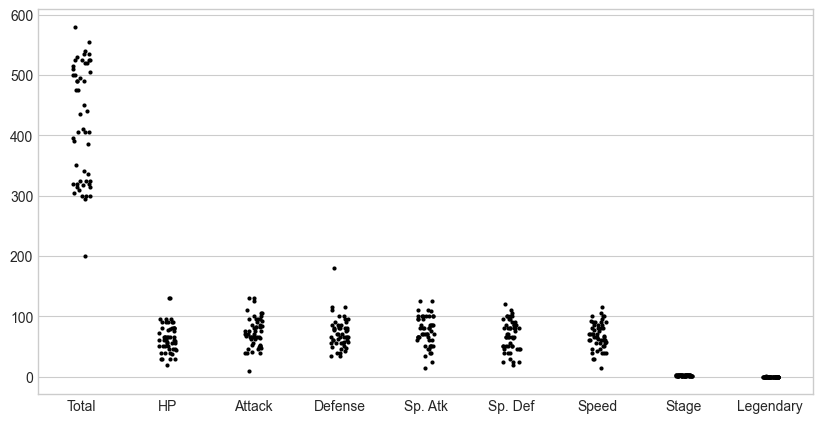

In [28]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df_gfw,
              color='k',
              size=3);

C:\Users\Bridgeschool37\AppData\Local\Temp\ipykernel_4128\1915430701.py:2: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df_gfw,
c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


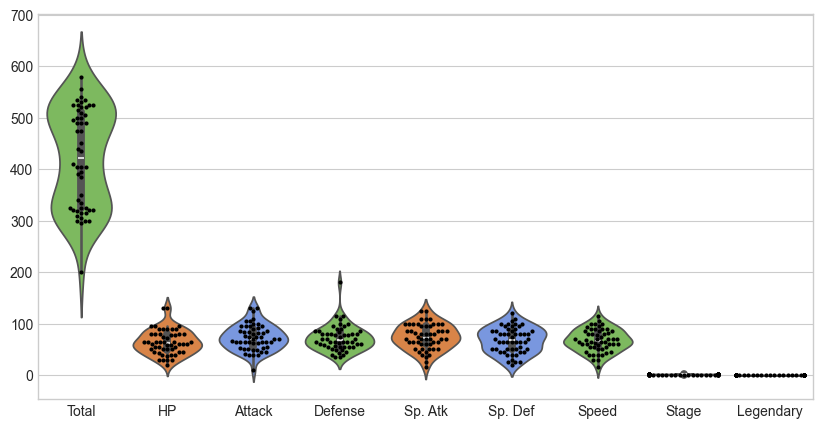

In [29]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_gfw,
               palette=colores);

sns.swarmplot(data=df_gfw,
              color='k',
              size=3);

### 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una saturación de 0.9. Pon un título con pyplot (como siempre).

Text(0.5, 1.0, 'Ataques de diferentes tipos de pokemon')

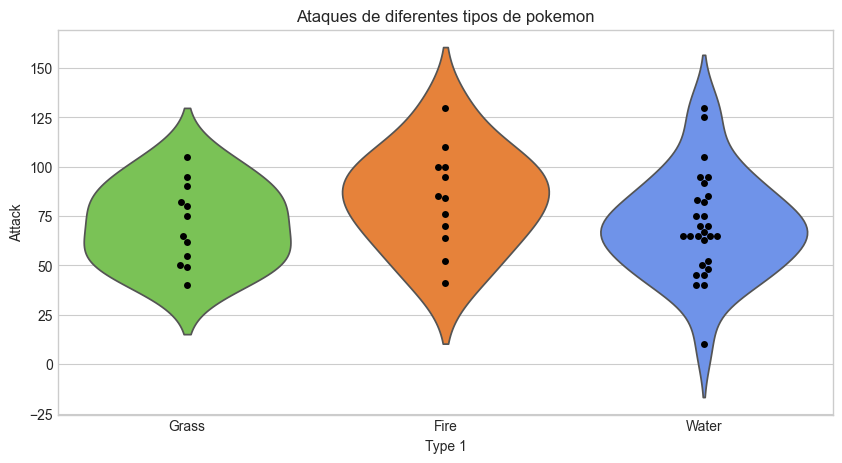

In [108]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_gfw,
               x='Type 1',
               y='Attack',
               palette=colores,
               inner=None,
               saturation=0.9);
sns.swarmplot(data=df_gfw,
               x='Type 1',
               y='Attack',
               color='k',
              );

plt.title('Ataques de diferentes tipos de pokemon')



### 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.

Dado un DataFrame, melt recibe varios parámetros:
* qué columnas del DataFrame se quedan igual.
* qué nombres de columnas del dataframe pasan a ser una columna nueva.
* cómo queremos llamar esas nuevas columnas.

Primero recuerda el Dataframe df_gfw con las primeras 5 filas.

In [31]:
df_gfw.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 20. Queremos dejar igual las variables 'Name' y 'Type 1'. Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'. Escribimos df_gfw.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column').

a)

In [119]:
melted=df_gfw.melt(id_vars=['Name', 'Type 1'], value_vars=['Total','HP','Attack','Defense','Sp. Def','Speed','Stage'], var_name='New Column')
melted.head(2)

,Name,Type 1,New Column,value
0,Bulbasaur,Grass,Total,318
1,Ivysaur,Grass,Total,405


ejemplo:

In [114]:
melted[melted['Name']=='Charmander']

,Name,Type 1,New Column,value
3,Charmander,Fire,Total,309
55,Charmander,Fire,HP,39
107,Charmander,Fire,Attack,52
159,Charmander,Fire,Defense,43
211,Charmander,Fire,Sp. Def,50
263,Charmander,Fire,Speed,65
315,Charmander,Fire,Stage,1


b)

In [ ]:
melted=df_gfw.melt(id_vars=['Name', 'Type 1'], value_vars=['Attack','Defense'], var_name='New Column')
melted.head(2)

In [33]:
melted=df_gfw.melt(id_vars=['Name', 'Type 1'], value_vars=['Attack','Defense'], var_name='New Column', value_name='Nivel')
melted.head(2)

,Name,Type 1,New Column,Nivel
0,Bulbasaur,Grass,Attack,49
1,Ivysaur,Grass,Attack,62


### 21. Pintamos el swarmplot con el melted y entendemos la información.

a)

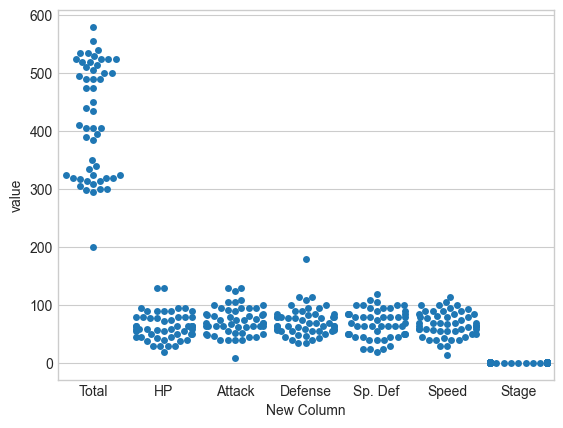

In [120]:
sns.swarmplot(data=melted,
              x='New Column',
              y='value'
              );

In [122]:
melted['New Column'].unique()

array(['Total', 'HP', 'Attack', 'Defense', 'Sp. Def', 'Speed', 'Stage'],
      dtype=object)

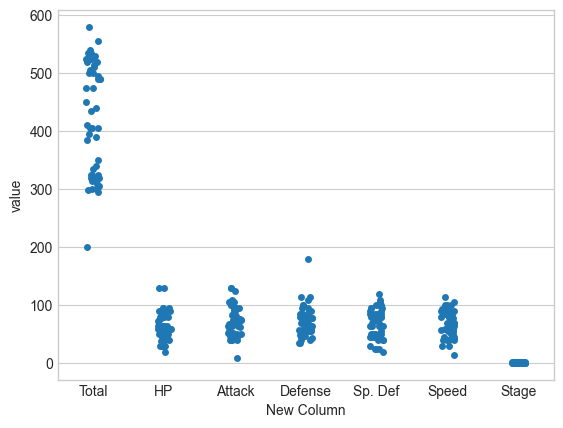

In [123]:
sns.stripplot(data=melted,
              x='New Column',
              y='value'
              );

b)

Text(46.33333333333333, 0.5, 'Nivel')

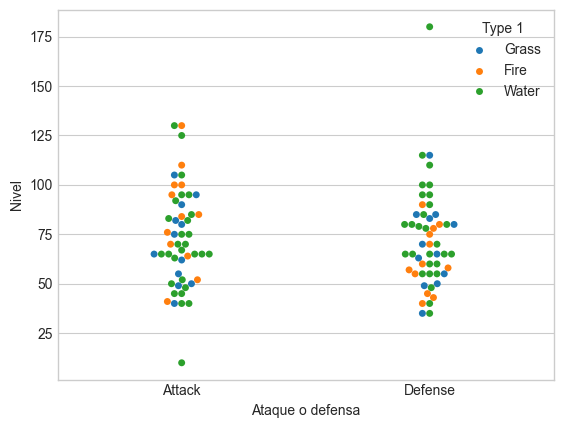

In [38]:
sns.swarmplot(data=melted,
              x='New Column',
              y='Nivel',
              hue='Type 1');

plt.xlabel('Ataque o defensa')
plt.ylabel('Nivel')

### 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt). En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon.

Dodge en inglés es "esquivar", ¿qué diferencia ves?

Usando plt: 
* fija el límite del eje Y entre 0 y 200.
* fija la leyenda con bbox_to_anchor arriba a la izquierda. Pista: (x, y, width, height).


a)

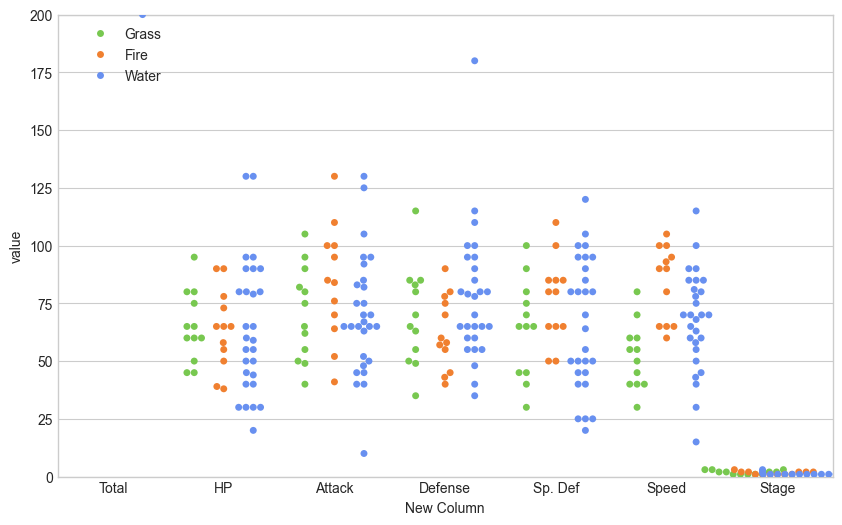

In [125]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=melted,
              x='New Column',
              y='value',
              hue='Type 1',
              palette=colores,
              dodge=True #Separa por las clases de la variable que hemos indicado
              );

plt.ylim(0,200)
plt.legend(bbox_to_anchor=(0.15, 1))

b)

Text(91.33333333333333, 0.5, 'Nivel')

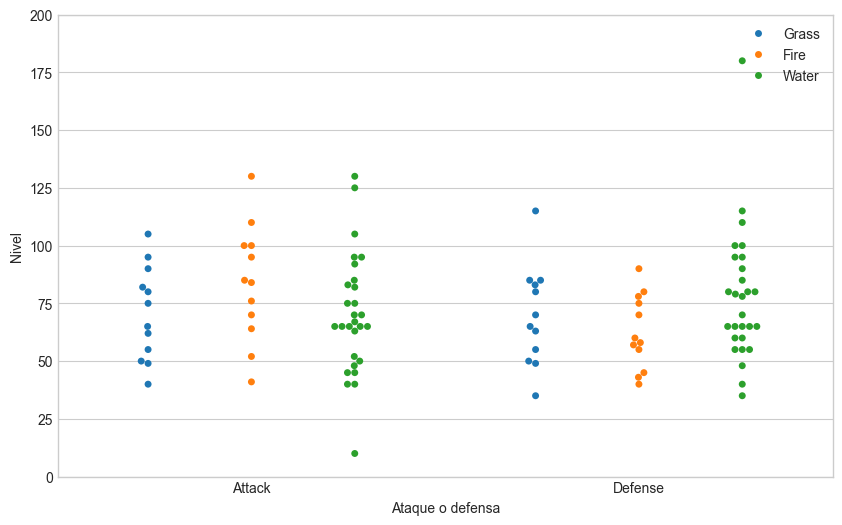

In [49]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=melted,
              x='New Column',
              y='Nivel',
              dodge=True, #nos separa los datos en diferentes tyoe 1 grupos.
              hue='Type 1');

plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.ylim(0,200)
plt.xlabel('Ataque o defensa')
plt.ylabel('Nivel')

Observa que incluso usando Seaborn, usamos Pyplot para trabajar con los ejes, la leyenda y el tamaño. Lo importante es que Seaborn y Pyplot conviven bien juntos

### 23. Mapas de calor.
* Calcula las correlaciones del primer DataFrame original df. Pista: las correlaciones se calculan con el método corr().

Recuerda: las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

In [53]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [127]:
#columnas_numericas = df.select_dtypes(include='number')
numericas=df.select_dtypes(include='number')
#numericas.drop(columns=['Stage'])
numericas.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000


In [128]:
numericas.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000


In [129]:
df.corr(numeric_only=True)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224,0.328412
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207,0.172441
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321,0.147486
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861,0.141576
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712,0.334159
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308,0.215314
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042,0.199969
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000,-0.142508
Legendary,0.328412,0.172441,0.147486,0.141576,0.334159,0.215314,0.199969,-0.142508,1.000000


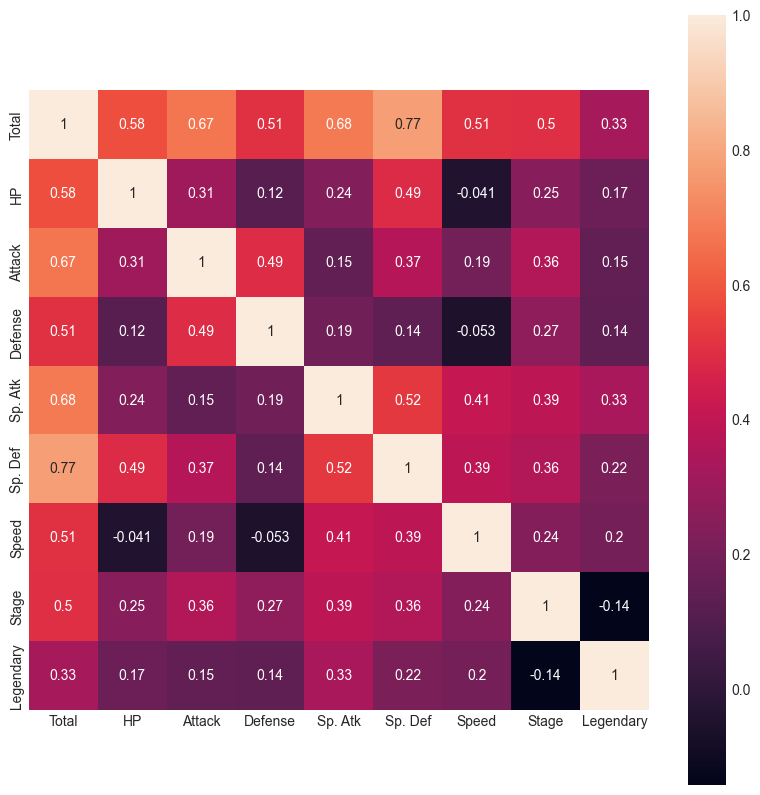

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True,square=True);

* ¿La correlación entre qué valores se encuentra?
* La autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias?
* Encuentra dos variables que veas que están fuertemente relacionadas según la correlación.
* Si tuvieras una matriz de correlación muy grande y te cobrasen por cada dato que lees, ¿qué harías?

### 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original.

In [133]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


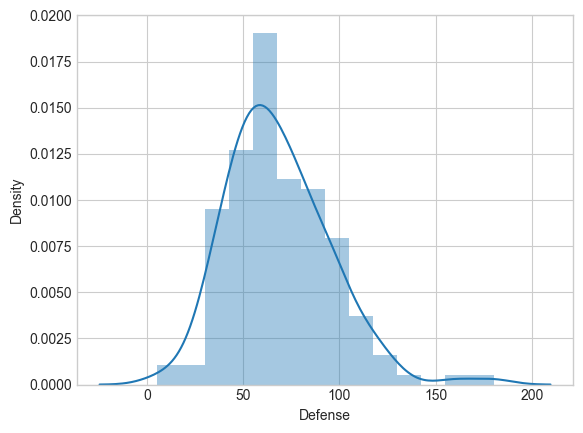

In [139]:
sns.distplot(df['Defense'],kde=True);

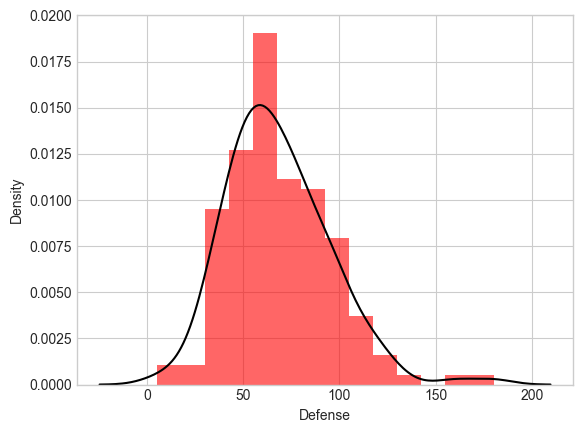

In [142]:
sns.distplot(df['Defense'],
            kde_kws={'color':'black',"label": "KDE"},
            hist_kws={'color':'red','alpha':0.6,"linewidth": 3});

### 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original. Usa un sns.countplot, plt.xticks y gira las etiquetas.

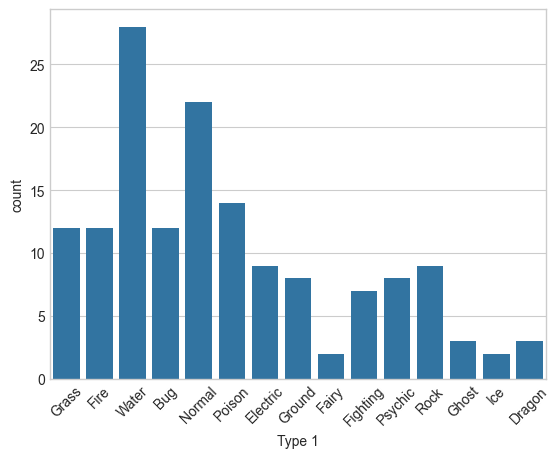

In [148]:
sns.countplot(x='Type 1',data=df)
plt.xticks(rotation=45, fontsize=10); #sino los nombres se solapan

### 26. Usa catplot con el DataFrame original. Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendarios y divide los colores según el Type 2.

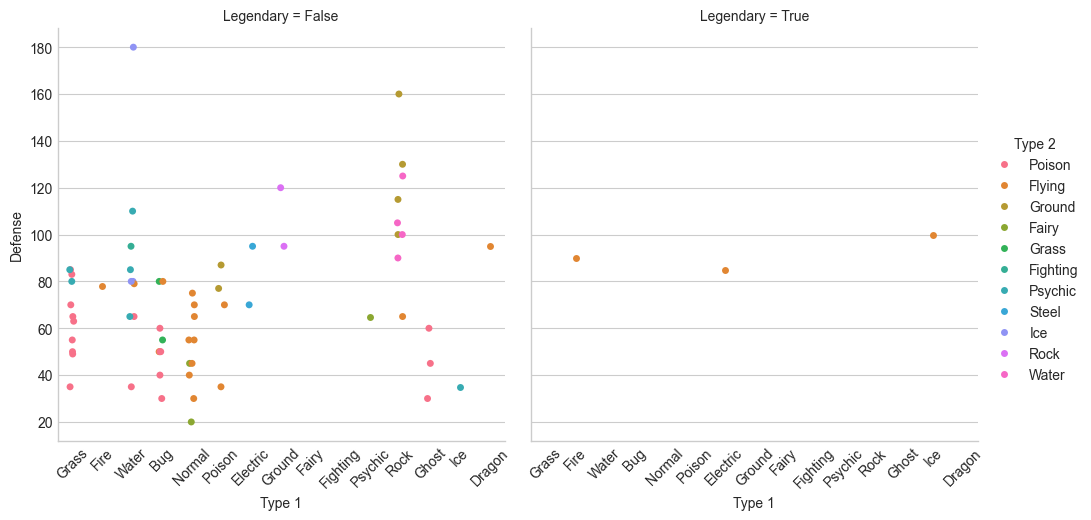

In [152]:
chart=sns.catplot(data=df, x='Type 1', y='Defense', hue='Type 2', col='Legendary') #Este grafico nos muestra 4 variables
chart.set_xticklabels(rotation=45, fontsize=10); #plt.xticks(rotation=45, fontsize=10);  solo nos modifica la segunda grafica

### 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque. Di un bin 2D donde caigan muchos puntos (ataque, defensa).

<Axes: xlabel='Attack', ylabel='Defense'>

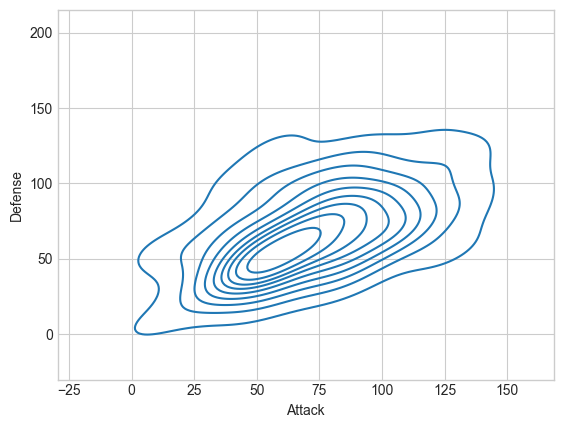

In [153]:
sns.kdeplot(x=df['Attack'],y=df['Defense']); #la zona donde mas pokemons se concentran 50-75

### 28. Pinta una distribución de probabilidad conjunta, pintando la defensa respecto al ataque del DataFrame original. Pista: jointplot()

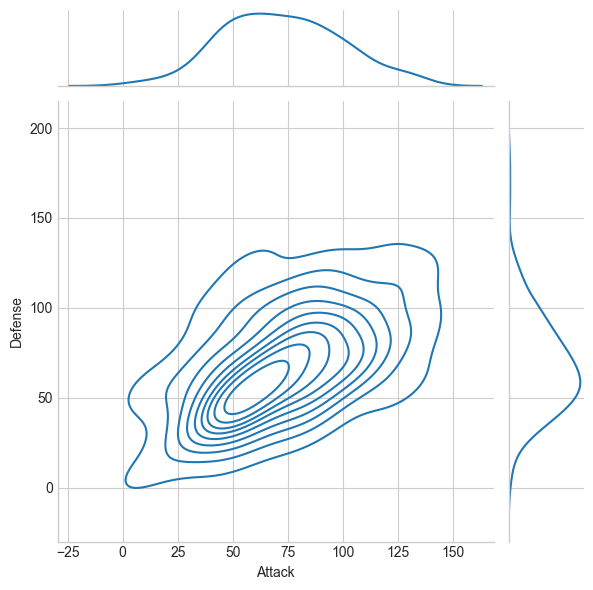

In [155]:
sns.jointplot(x='Attack',y='Defense', data=df, kind='kde');